In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [2]:
import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

utils.reset_seeds(0)

In [3]:
import sys

In [19]:
def neg_log_likelihood(y_true ,y_predicted):
    #print("y_s")
    #print(y_test.shape)
    #y_predicted += 1e-6
    y_pred_mean, y_pred_sd = y_predicted[:,0], y_predicted[:,1]
    # y_pred_sd += 1e-6
    # y_pred_mean += 1e-6
    # y_pred_sd = tf.clip_by_value(t=tf.math.square(y_pred_sd),
    #                                clip_value_min=tf.constant(1e-4),
    #                                clip_value_max=tf.constant(1e+100))
    #y_pred_sd = tf.math.exp(y_pred_sd)
    # if False:
    #     # print("y_pred_mean")
    #     # tf.print(y_pred_mean, output_stream=sys.stdout)
    #     # print("y_pred_sd")
    #     # tf.print(y_pred_sd)
    #     #y_pred_sd += 1e-6
    #     # with tf.Session() as sess:  
    #     #     print(y_pred_mean.eval()) 
    #     #a = 0/0
    #     # with tf.compat.v1.Session() as sess:
    #     #     print(y_pred_mean.eval())
    #     #     print(y_pred_sd.eval())
    #     ...
    
    #tf.print(y_pred_sd)
    #tf.print(tf.reduce_mean(tf.math.log(tf.math.square(y_pred_sd)) + 0.5 * tf.math.square((y_pred_mean - y_true) / tf.math.square(y_pred_sd))))
    # tf.print(tf.math.log(tf.math.square(y_pred_sd)))

    return - tf.reduce_mean(y_pred_sd + 0.5 * tf.math.square((y_pred_mean - y_true) / tf.math.exp(y_pred_sd)))

In [5]:
def train_model(m, epochs=2000):
    X = np.linspace(-1, 1, 50)
    y = X**2
    X_train, y_train = X, y
    X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

    m.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=0.01, amsgrad=False, epsilon=0.001),
        loss=neg_log_likelihood,
        metrics=[keras.metrics.MeanSquaredError()],
    )

    h = m.fit(X, y, batch_size=8, epochs=epochs, verbose=0,
                    callbacks=[CustomLogger(100)])

    return m

In [29]:
def plot_mean_and_variance(m, X, X_train=np.linspace(-1, 1, 50), y_train=None):
    # for each prediction, plot the mean value and the variance of the prediction
    if y_train is None:
        y_train = X_train**2
        
    y_pred = m.predict(X)
    # print(y_pred)
    y_pred_mean, y_pred_sd = y_pred[:,0], y_pred[:,1]
    y_pred_sd = np.exp(y_pred_sd)
    plt.plot(X, y_pred_mean, label="mean")
    plt.fill_between(X, y_pred_mean - y_pred_sd, y_pred_mean + y_pred_sd, alpha=0.2, label="variance")
    plt.scatter(X_train, y_train, marker='+', color="red", label="train")
    plt.legend()
    plt.show()

In [7]:
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2


Epoch:   0 | Loss: -2.19371e-01
Epoch: 100 | Loss: -6.65947e-01
Epoch: 200 | Loss: -6.67898e-01
Epoch: 300 | Loss: -6.57471e-01
Epoch: 400 | Loss: -6.65136e-01
Epoch: 500 | Loss: -6.66550e-01
Epoch: 600 | Loss: -6.64899e-01
Epoch: 700 | Loss: -6.63876e-01
Epoch: 800 | Loss: -6.64740e-01
Epoch: 900 | Loss: -6.66368e-01
Epoch: 1000 | Loss: -6.63981e-01
Epoch: 1100 | Loss: -6.64850e-01
Epoch: 1200 | Loss: -6.64965e-01
Epoch: 1300 | Loss: -6.65511e-01
Epoch: 1400 | Loss: -6.56646e-01
Epoch: 1500 | Loss: -6.64365e-01
Epoch: 1600 | Loss: -6.66661e-01
Epoch: 1700 | Loss: -6.63218e-01
Epoch: 1800 | Loss: -6.65890e-01
Epoch: 1900 | Loss: -6.67355e-01
313/313 [==============================] - 1s 2ms/step


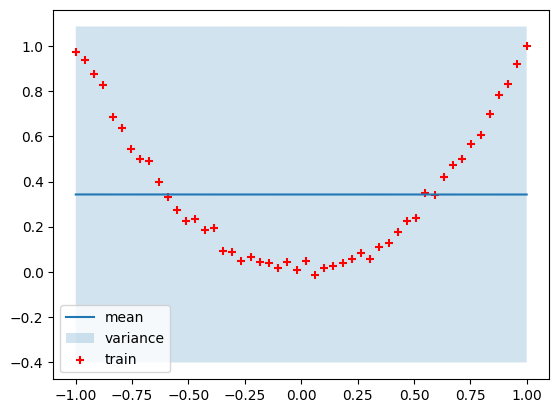

In [8]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=50, activation='sigmoid', name="layer_1"),
    layers.Dense(units=50, activation='sigmoid', name="layer_2"),
    layers.Dense(units=50, activation='sigmoid', name="layer_2b"),
    layers.Dense(units=50, activation='sigmoid', name="layer_2c"),
    layers.Dense(units=2, activation='sigmoid', name="layer_3"),
])

X = np.linspace(-1, 1, 50)
y = X**2 + np.random.normal(0, 0.02, 50)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.001, amsgrad=False, epsilon=0.001),
    loss=neg_log_likelihood,
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=2000, verbose=0,
                callbacks=[CustomLogger(100)])


plot_mean_and_variance(model, X_valid, X_train, y_train)

In [81]:
def neg_log_likelihood(y_true ,y_predicted):
    #print("y_s")
    #print(y_test.shape)
    #y_predicted += 1e-6
    y_pred_mean, y_pred_sd = y_predicted[:,0], y_predicted[:,1]
    # y_pred_sd += 1e-6
    # y_pred_mean += 1e-6


    y_pred_sd = tf.clip_by_value(t=y_pred_sd,
                                   clip_value_min=tf.constant(-15.0),
                                   clip_value_max=tf.constant(+15.0))


    #y_pred_sd = tf.math.exp(y_pred_sd)
    # if False:
    #     # print("y_pred_mean")
    #     # tf.print(y_pred_mean, output_stream=sys.stdout)
    #     # print("y_pred_sd")
    #     # tf.print(y_pred_sd)
    #     #y_pred_sd += 1e-6
    #     # with tf.Session() as sess:  
    #     #     print(y_pred_mean.eval()) 
    #     #a = 0/0
    #     # with tf.compat.v1.Session() as sess:
    #     #     print(y_pred_mean.eval())
    #     #     print(y_pred_sd.eval())
    #     ...
    
    #tf.print(y_pred_sd)
    #tf.print(tf.reduce_mean(tf.math.log(tf.math.square(y_pred_sd)) + 0.5 * tf.math.square((y_pred_mean - y_true) / tf.math.square(y_pred_sd))))
    # tf.print(tf.math.log(tf.math.square(y_pred_sd)))

    # y_pred_sd ongi log variance
    return tf.reduce_mean(y_pred_sd + tf.math.square((y_pred_mean - y_true) / tf.math.exp(y_pred_sd)))

In [79]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
last_layer = model.get_layer('layer_3')
l_w = last_layer.trainable_weights
l_w#[1].trainable = False

[<tf.Variable 'layer_3/kernel:0' shape=(100, 2) dtype=float32, numpy=
 array([[-5.16596437e-03,  3.52763236e-02],
        [-1.68548360e-01,  1.43112004e-01],
        [ 8.94930959e-02, -1.19942635e-01],
        [ 2.33879685e-02, -1.80710807e-01],
        [-8.21697861e-02,  1.38419211e-01],
        [-1.50630414e-01,  1.67931587e-01],
        [ 1.64453655e-01,  3.75284255e-03],
        [-1.86739534e-01, -1.76902264e-02],
        [-2.03001767e-01, -1.26075149e-01],
        [ 8.90993476e-02, -5.65928668e-02],
        [-2.34195173e-01,  4.21952009e-02],
        [-1.11972615e-01, -1.94732159e-01],
        [ 2.16385931e-01, -2.15675682e-01],
        [ 1.67745471e-01,  1.89225197e-01],
        [-1.42879963e-01,  1.53738260e-02],
        [ 1.89080834e-04,  1.31577879e-01],
        [ 9.54422355e-02,  2.20367193e-01],
        [ 1.14980310e-01, -9.36885774e-02],
        [-1.25150815e-01,  1.84977829e-01],
        [ 2.39785403e-01,  5.04026413e-02],
        [-1.44256592e-01, -4.12272513e-02],
      

Epoch:   0 | Loss: 1.64339e-01
Epoch: 100 | Loss: -3.35483e-01
Epoch: 200 | Loss: -3.25488e-01
Epoch: 300 | Loss: -3.22929e-01
Epoch: 400 | Loss: -3.16916e-01
Epoch: 500 | Loss: -3.21944e-01
Epoch: 600 | Loss: -3.42811e-01
Epoch: 700 | Loss: -3.34810e-01
Epoch: 800 | Loss: -3.44418e-01
Epoch: 900 | Loss: -3.46521e-01
313/313 [==============================] - 2s 7ms/step


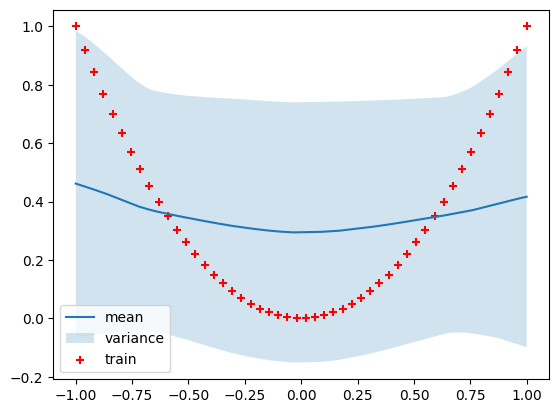

In [87]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    #layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
last_layer = model.get_layer('layer_3')
l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 50)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    #optimizer=keras.optimizers.SGD()"SGD",
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),#epsilon=0.001
    loss=neg_log_likelihood,
    #metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                callbacks=[CustomLogger(100)])


plot_mean_and_variance(model, X_valid, X_train)

In [ ]:
new_l3 = [w*10 for w in model.get_layer('layer_3').get_weights()]
new_l3[1] *= 100
new_l3[0] = np.around(new_l3[0])
new_l3[1] = np.around(new_l3[1])

simple_weights.get_layer('layer_3').set_weights(new_l3)



In [ ]:
model.weights

In [38]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 10) dtype=float32, numpy=
 array([[-0.62576896, -0.39457902, -0.0205129 ,  0.53686106,  0.20653649,
          0.59102774, -0.21454562,  0.33277768, -0.4118534 , -0.12949902]],
       dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.07620438,  0.0718923 ,  0.07360313, -0.06018271,  0.07661424,
         0.0381523 ,  0.11919266, -0.03616139, -0.04229193, -0.12978853],
       dtype=float32)>,
 <tf.Variable 'layer_2/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-4.88460124e-01, -4.28525984e-01,  1.38440162e-01,
         -2.77246982e-01,  3.77897769e-01, -4.48820293e-01,
         -3.79467726e-01,  2.30214670e-01, -2.63669997e-01,
         -1.17313802e-01],
        [-1.14022285e-01, -3.83956075e-01,  4.31135148e-01,
          1.88898802e-01,  2.58980215e-01,  2.75558650e-01,
          2.86404878e-01,  2.89479911e-01, -4.62467521e-01,
          1.96325675e-01],
        [-7.60425776e-02,  3.32645297

In [41]:
np.exp(-1.2860894e-03)

0.9987147372585489

In [42]:
np.exp(7.3352456e-04)

1.0007337936549319

In [40]:
model.predict(X_train)

2/2 [==============================] - 0s 13ms/step


array([[ 4.4752038e-01,  3.5683140e-03],
       [ 4.3970257e-01,  3.0828789e-03],
       [ 4.3188471e-01,  2.5974438e-03],
       [ 4.2406690e-01,  2.1119937e-03],
       [ 4.1624910e-01,  1.6265586e-03],
       [ 4.0843123e-01,  1.1411160e-03],
       [ 4.0061343e-01,  6.5565109e-04],
       [ 3.9279562e-01,  1.7023832e-04],
       [ 3.8497776e-01, -3.1521171e-04],
       [ 3.7715995e-01, -8.0063939e-04],
       [ 3.6934215e-01, -1.2860894e-03],
       [ 3.6152428e-01, -1.7715394e-03],
       [ 3.5370648e-01, -2.2569746e-03],
       [ 3.4588867e-01, -2.7424097e-03],
       [ 3.3807081e-01, -3.2278523e-03],
       [ 3.3025301e-01, -3.7132874e-03],
       [ 3.2416755e-01, -3.3174753e-03],
       [ 3.1929487e-01, -2.3047179e-03],
       [ 3.1442219e-01, -1.2919754e-03],
       [ 3.0954957e-01, -2.7923658e-04],
       [ 3.0467689e-01,  7.3352456e-04],
       [ 2.9980421e-01,  1.7462596e-03],
       [ 2.9461455e-01,  2.0646118e-03],
       [ 2.8934705e-01,  2.9245540e-03],
       [ 2.89040

In [44]:
y_pred_mean = 1.1 #4.4752038e-01
y_pred_sd = 3.5683140e-03
y_true = 1
y_pred_sd + tf.math.square((y_pred_mean - y_true) / tf.math.exp(y_pred_sd))


<tf.Tensor: shape=(), dtype=float32, numpy=0.013497202>

In [36]:
model.fit(X, y, batch_size=8, epochs=3000, verbose=0,
                callbacks=[CustomLogger(100)])


plot_mean_and_variance(model, X_valid)

Epoch:   0 | Loss: 9.29859e-02
Epoch: 100 | Loss: 9.28545e-02
Epoch: 200 | Loss: 9.57104e-02
Epoch: 300 | Loss: 9.56673e-02
Epoch: 400 | Loss: 9.73346e-02
Epoch: 500 | Loss: 9.74980e-02
Epoch: 600 | Loss: 9.38245e-02
Epoch: 700 | Loss: 9.40336e-02
Epoch: 800 | Loss: 9.24718e-02
Epoch: 900 | Loss: 9.20429e-02
Epoch: 1000 | Loss: 9.64645e-02
Epoch: 1100 | Loss: 9.76465e-02
Epoch: 1200 | Loss: 9.00120e-02
Epoch: 1300 | Loss: 9.60947e-02
Epoch: 1400 | Loss: 9.59211e-02
Epoch: 1500 | Loss: 9.28308e-02
Epoch: 1600 | Loss: 9.48864e-02
Epoch: 1700 | Loss: 8.98272e-02
Epoch: 1800 | Loss: 9.67606e-02
Epoch: 1900 | Loss: 9.57115e-02
Epoch: 2000 | Loss: 9.61380e-02
Epoch: 2100 | Loss: 9.82563e-02
Epoch: 2200 | Loss: 9.56885e-02


KeyboardInterrupt: 

313/313 [==============================] - 3s 10ms/step


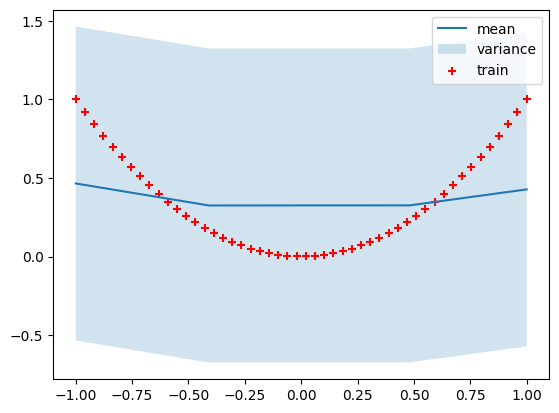

In [30]:
plot_mean_and_variance(model, X_valid)

In [28]:
tulem = model.predict(X_valid)
tulem = tulem[:,1]
tf.math.exp(tulem)

313/313 [==============================] - 3s 10ms/step


<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([0.9997052 , 0.99970526, 0.9997053 , ..., 0.99975175, 0.9997517 ,
       0.9997516 ], dtype=float32)>

In [31]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[-1.3256693 , -0.24178754,  0.23584881,  0.9852123 ]],
       dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(4,) dtype=float32, numpy=array([-0.4326882 , -0.29877225, -0.1903515 , -0.36683872], dtype=float32)>,
 <tf.Variable 'layer_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.7722343 , -0.6773776 ,  0.5850079 , -0.10424754],
        [ 0.70995826, -0.7000709 , -0.43372017,  0.49989814],
        [-0.5596562 , -0.48498845,  0.02514817, -0.7692326 ],
        [ 0.13720338,  0.23631257,  0.64477044,  0.1915087 ]],
       dtype=float32)>,
 <tf.Variable 'layer_2/bias:0' shape=(4,) dtype=float32, numpy=array([-0.09554075, -0.15716313, -0.06688983, -0.097479  ], dtype=float32)>,
 <tf.Variable 'layer_3/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.00405148,  0.30779937],
        [ 0.07046216,  0.2764293 ],
        [ 0.30756664, -0.0003791 ],
        [-0.00224063, -0.1412686 ]], dtype=float

Epoch:   0 | Loss: 4.25340e+13
Epoch: 100 | Loss: -2.39375e-01
Epoch: 200 | Loss: -6.47994e-01
Epoch: 300 | Loss: -4.24506e-01
Epoch: 400 | Loss: -6.23721e-01
Epoch: 500 | Loss: -6.46440e-01
Epoch: 600 | Loss: -6.27419e-01
Epoch: 700 | Loss: -6.61512e-01
Epoch: 800 | Loss: -6.63836e-01
Epoch: 900 | Loss: -4.96185e-01
Epoch: 1000 | Loss: -6.47482e-01
Epoch: 1100 | Loss: -6.44895e-01
Epoch: 1200 | Loss: -6.79664e-01
Epoch: 1300 | Loss: -6.39497e-01
Epoch: 1400 | Loss: 1.82786e-01
Epoch: 1500 | Loss: -6.19546e-01
Epoch: 1600 | Loss: -6.51817e-01
Epoch: 1700 | Loss: -6.03347e-01
Epoch: 1800 | Loss: -6.51039e-01
Epoch: 1900 | Loss: -6.27810e-01
313/313 [==============================] - 1s 1ms/step


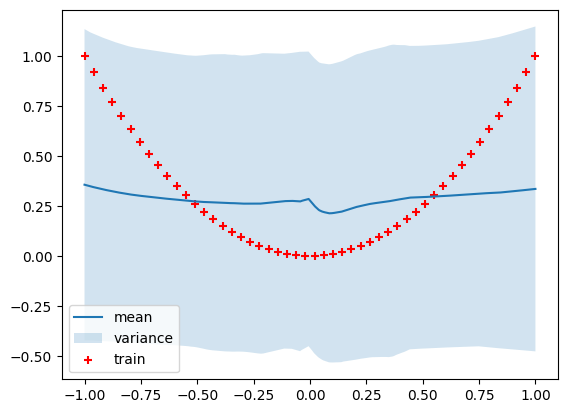

In [10]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=100, activation='relu', name="layer_1"),
    layers.Dense(units=100, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3"),
])

train_model(model)

plot_mean_and_variance(model, X_valid)

Epoch:   0 | Loss: 1.79600e+13
Epoch: 100 | Loss: -3.70753e-01
Epoch: 200 | Loss: -5.92256e-01
Epoch: 300 | Loss: -5.68486e-01
Epoch: 400 | Loss: -6.34432e-01
Epoch: 500 | Loss: -6.57425e-01
Epoch: 600 | Loss: -4.94871e-01
Epoch: 700 | Loss: -6.53702e-01
Epoch: 800 | Loss: -6.79374e-01
Epoch: 900 | Loss: -5.57508e-01
Epoch: 1000 | Loss: -6.44252e-01
Epoch: 1100 | Loss: -6.65086e-01
Epoch: 1200 | Loss: -6.91981e-01
Epoch: 1300 | Loss: -6.57668e-01
Epoch: 1400 | Loss: -6.48613e-01
Epoch: 1500 | Loss: -6.53548e-01
Epoch: 1600 | Loss: -6.43385e-01
Epoch: 1700 | Loss: -6.95130e-01
Epoch: 1800 | Loss: -6.54558e-01
Epoch: 1900 | Loss: -6.66275e-01
313/313 [==============================] - 1s 1ms/step


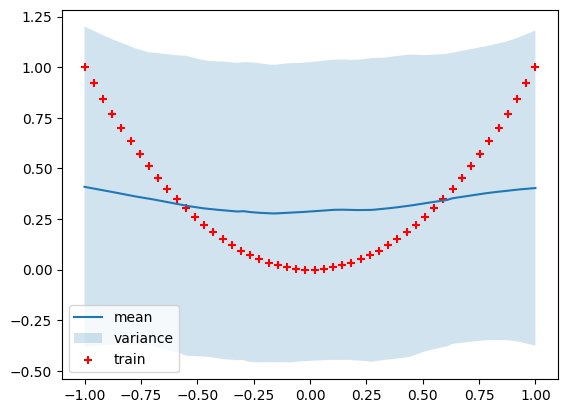

In [11]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=50, activation='relu', name="layer_1"),
    layers.Dense(units=50, activation='relu', name="layer_2"),
    layers.Dense(units=50, activation='relu', name="layer_2b"),
    layers.Dense(units=50, activation='relu', name="layer_2c"),
    layers.Dense(units=2, activation='linear', name="layer_3"),
])

train_model(model)

plot_mean_and_variance(model, X_valid)

## Teeme overkill mudeli ja vaatame kas ta üldse oskaks ära õppida

In [12]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV


utils.reset_seeds(2002)

def create_model():
    return keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=50, activation='sigmoid', name="layer_1"),
    layers.Dense(units=50, activation='sigmoid', name="layer_2"),
    layers.Dense(units=2, activation='sigmoid', name="layer_3"),
])


X = np.linspace(-1, 1, 50)
y = X**2 + np.random.normal(0, 0.02, 50)
X_train, y_train = X, y

batch_size = [8, 16, 32]
learn_rate = [0.0001, 0.001, 0.01, 0.1]
epsilon = [1, 0.1, 0.01, 0.0001, 0.00001]  # see Adami epsilon 
amsgard = [True, False]

param_grid = dict(batch_size=batch_size, 
    optimizer__learning_rate=learn_rate,
    optimizer__amsgrad=amsgard,
    optimizer__epsilon=epsilon)

model = KerasRegressor(model=create_model, loss=neg_log_likelihood, optimizer="Adam", epochs=10, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, cv=3, scoring='neg_mean_squared_error')

grid_result = grid.fit(X_train.reshape(-1, 1), y_train)

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [13]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)),

nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.0001}
nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.001}
nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.01}
nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 1, 'optimizer__learning_rate': 0.1}
nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 0.1, 'optimizer__learning_rate': 0.0001}
nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 0.1, 'optimizer__learning_rate': 0.001}
nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 0.1, 'optimizer__learning_rate': 0.01}
nan (nan) with: {'batch_size': 8, 'optimizer__amsgrad': True, 'optimizer__epsilon': 0.1, 'optimizer__learning_rate': 0.1}
nan (nan) with: {'ba

In [14]:
grid.best_params_

{'batch_size': 8,
 'optimizer__amsgrad': True,
 'optimizer__epsilon': 1,
 'optimizer__learning_rate': 0.0001}